In [1]:
import mglearn
#from mglearn import make_waves
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsRegressor


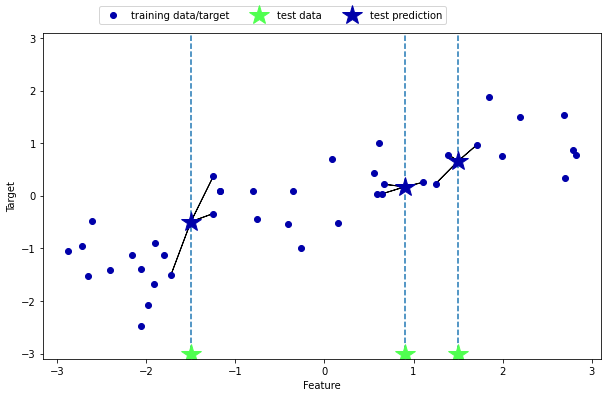

In [2]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [3]:
X,y=mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
reg=KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [4]:
print("Test set prediction:\n{}".format(reg.predict(X_test)))

Test set prediction:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [5]:
print("Test set R^2\n{:.2f}".format(reg.score(X_test,y_test)))

#0.83 indicates a relatively good fit

Test set R^2
0.83


# Analyzing KNeighborsRegressor

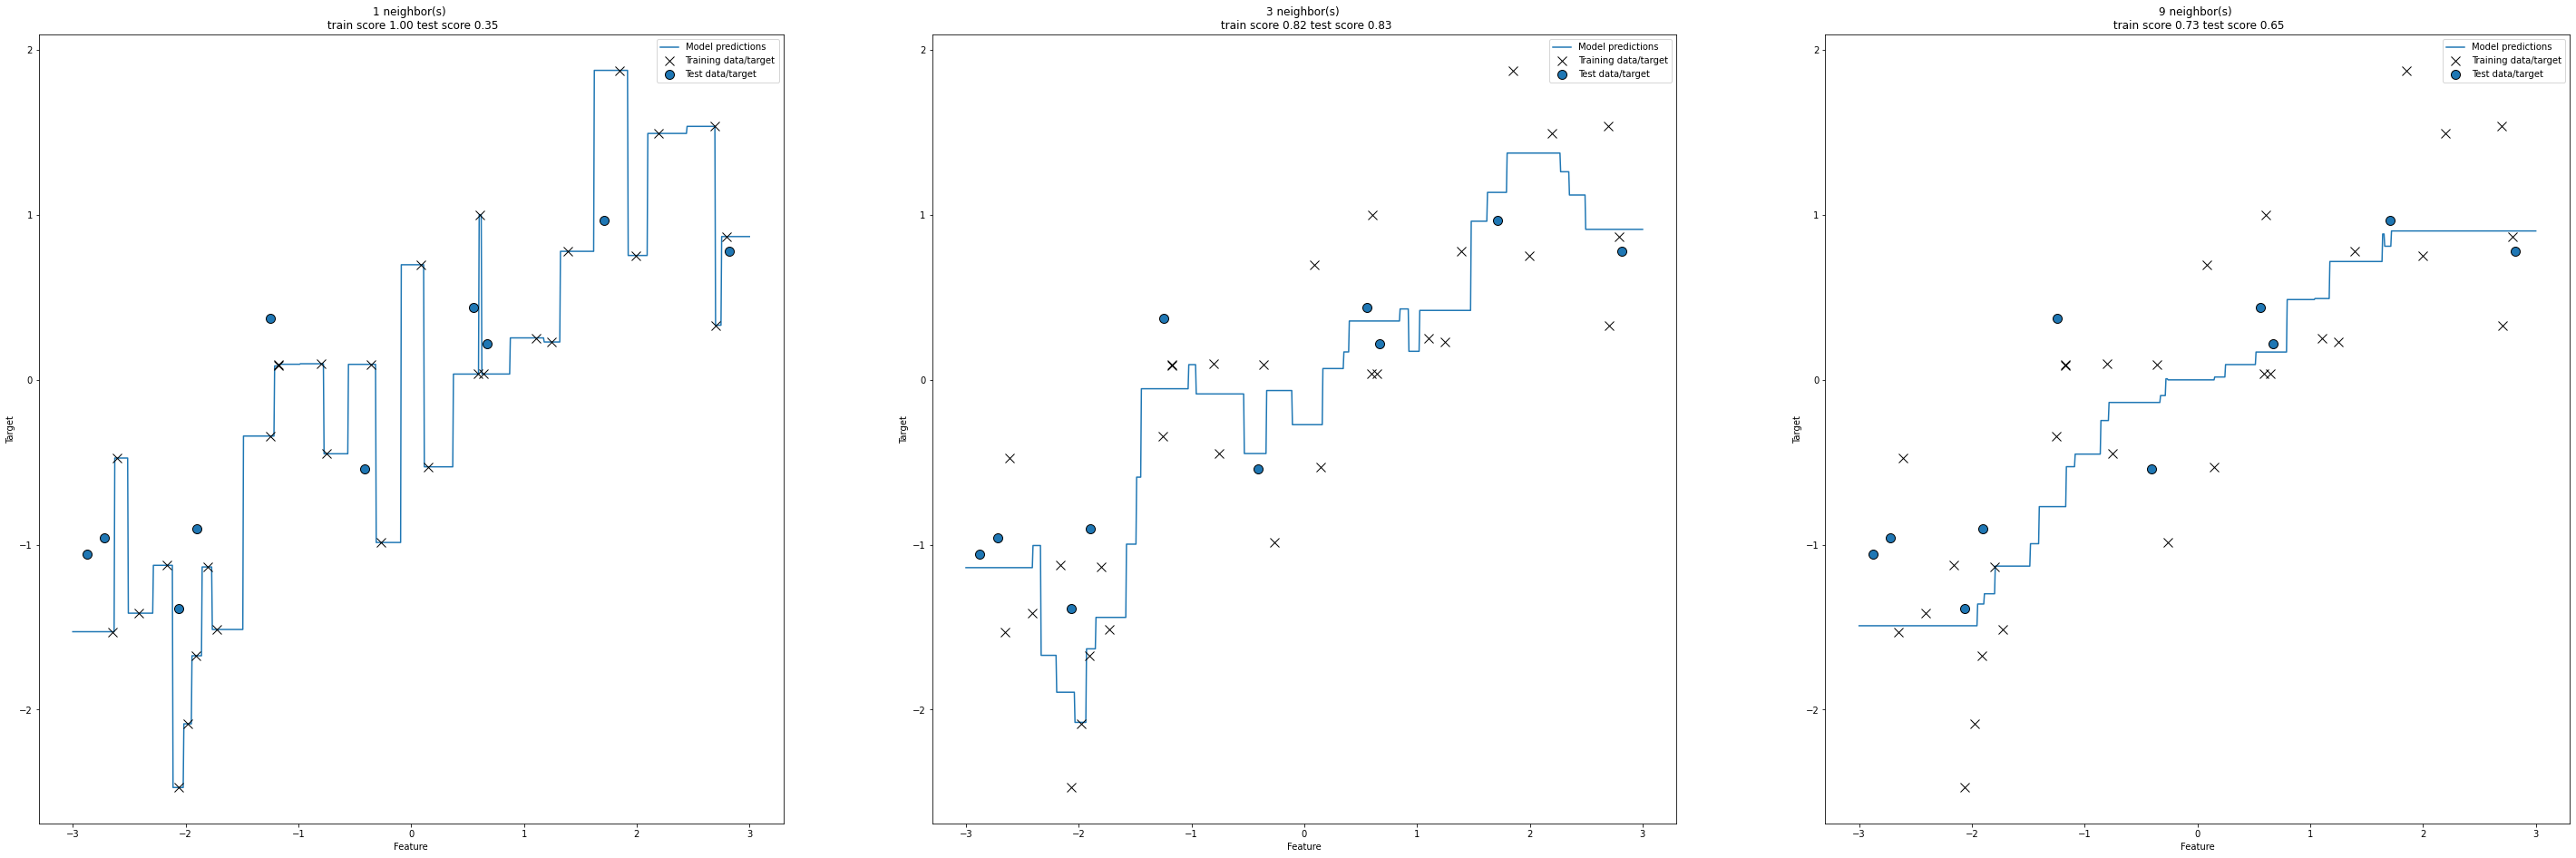

In [6]:
fig, axes = plt.subplots(1,3,figsize=(50,16))
points = np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbor, ax in zip([1,3,9],axes):
    reg=KNeighborsRegressor(n_neighbors=n_neighbor)
    reg.fit(X_train, y_train)
    ax.plot(points, reg.predict(points))
    mglearn.discrete_scatter(X_train, y_train,markers=["x"], ax=ax)
    mglearn.discrete_scatter(X_test, y_test, ax=ax)
    ax.set_title("{} neighbor(s) \n train score {:.2f} test score {:.2f}".format(n_neighbor,reg.score(X_train,y_train),reg.score (X_test,y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    ax.legend(["Model predictions","Training data/target","Test data/target"],loc="best")

## Interpretation: 
-Small number of neighbor (complex model): each point in the training set has obvious influence on the the predictions (predicted values go thru all the data points) ---> unsteady prediction

-More neighbors (less complex model) lead to smoother predictions, but predictions do not fit the training data well